In [1]:
#import set-up
import matplotlib.pyplot as plt
import pandas as pd 
from pathlib import Path 
import scipy.stats as st
from sklearn.linear_model import LinearRegression 
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
#Open the csv's for Mental Health Data
indicators_A_D_path = Path("Mental Health Resources/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days_20240807.csv")

#Read Mental Health Data
indicators_df = pd.read_csv(indicators_A_D_path)

#Display
indicators_df

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,20.7,17.9,23.8,17.9 - 23.8,19.2-20.8
16088,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,20.3,17.5,23.4,17.5 - 23.4,19.2-20.8
16089,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,22.8,19.2,26.8,19.2 - 26.8,22.4-24.6
16090,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,18.9,15.6,22.6,15.6 - 22.6,14.8-19.1


# Age Analysis
--
## Major Questions 
Is there a relationship between age and frequency of symptoms? 


In [3]:
age_df = indicators_df[indicators_df['Group'].str.contains('By Age')]

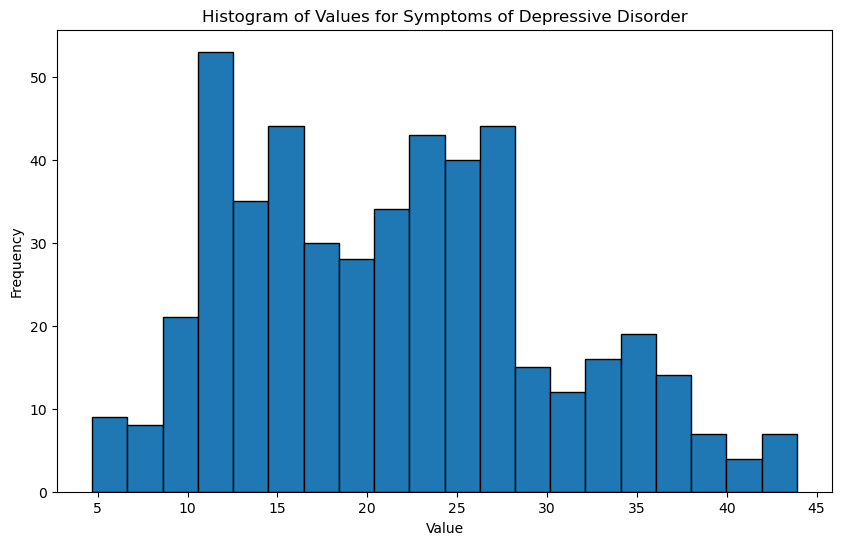

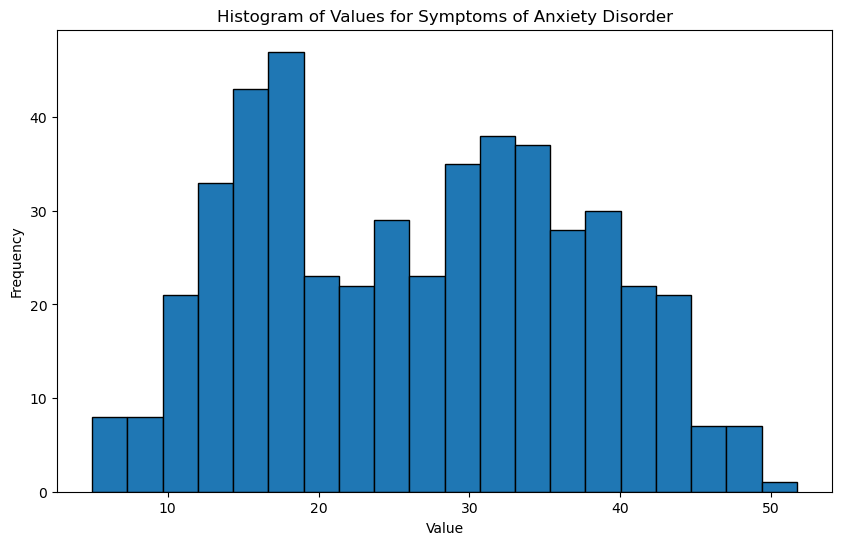

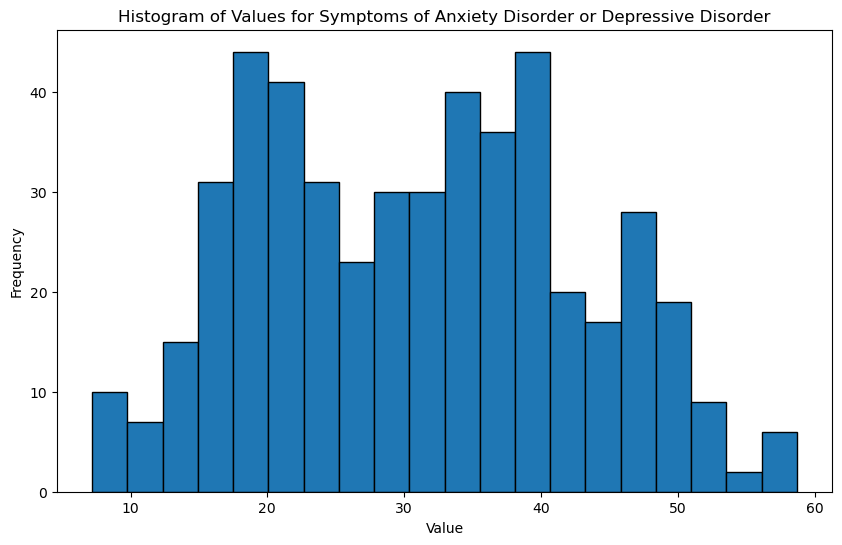

In [4]:
# Get the unique indicators from the DataFrame
indicators = age_df['Indicator'].unique()

# Loop through each indicator and create a histogram for the 'Value' column
for indicator in indicators:
    plt.figure(figsize=(10, 6))
    
    # Filter the DataFrame for the specific indicator
    subset = age_df[age_df['Indicator'] == indicator]
    
    # Plot the histogram
    plt.hist(subset['Value'], bins=20, edgecolor='black')
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Values for {indicator}')
    
    # Show the plot
    plt.savefig('Value histograms by Indicator.png')
    plt.show()



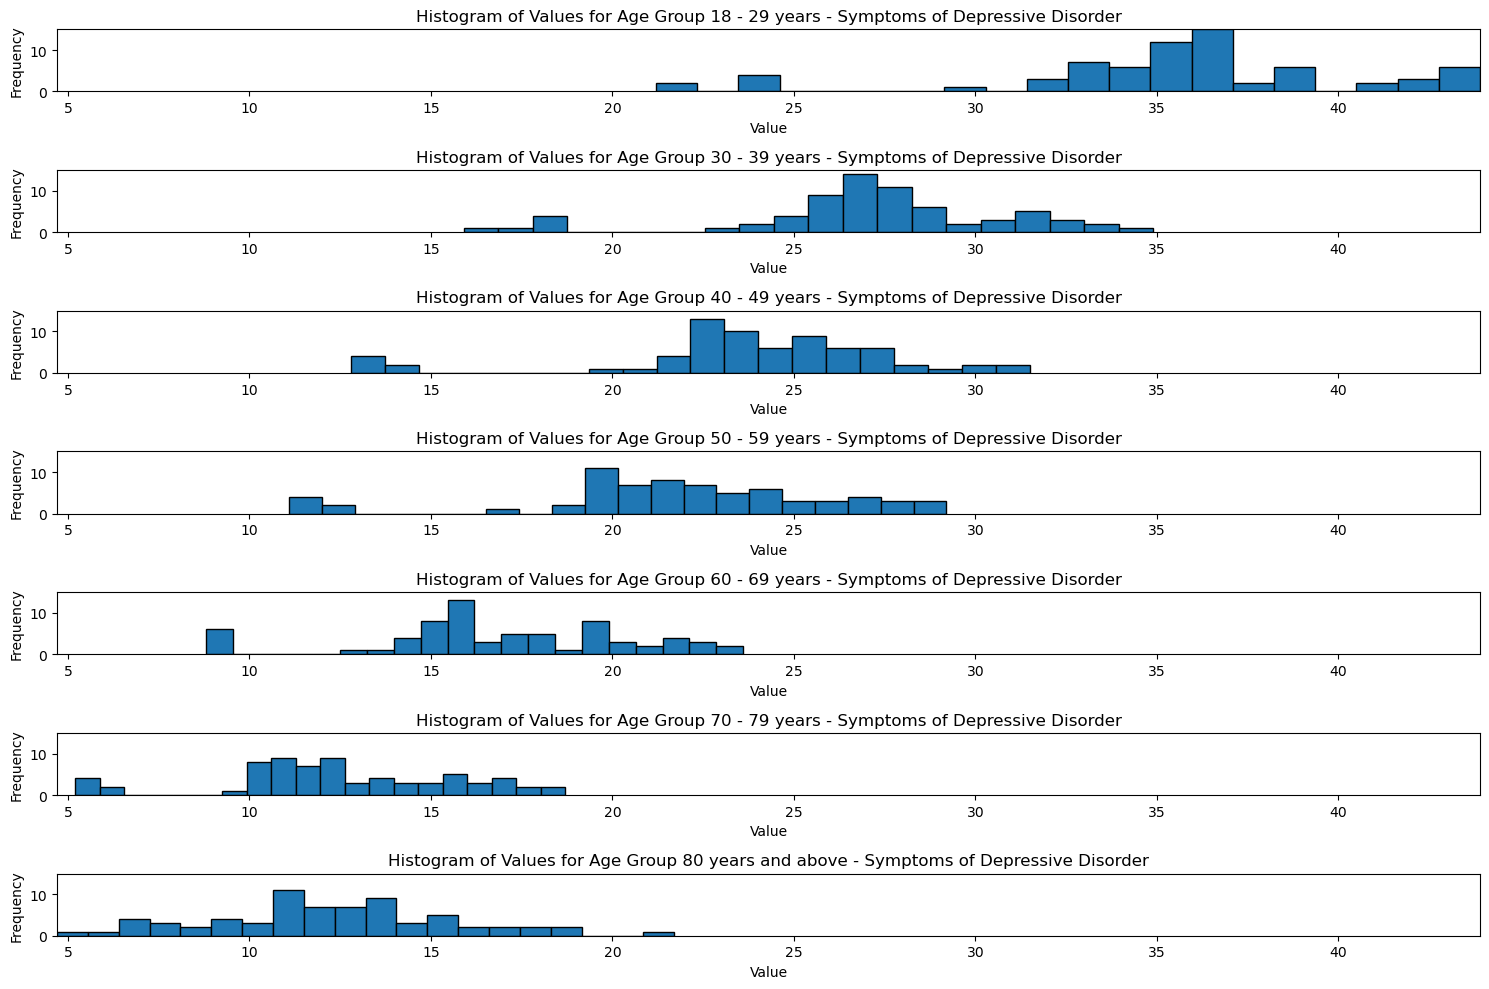

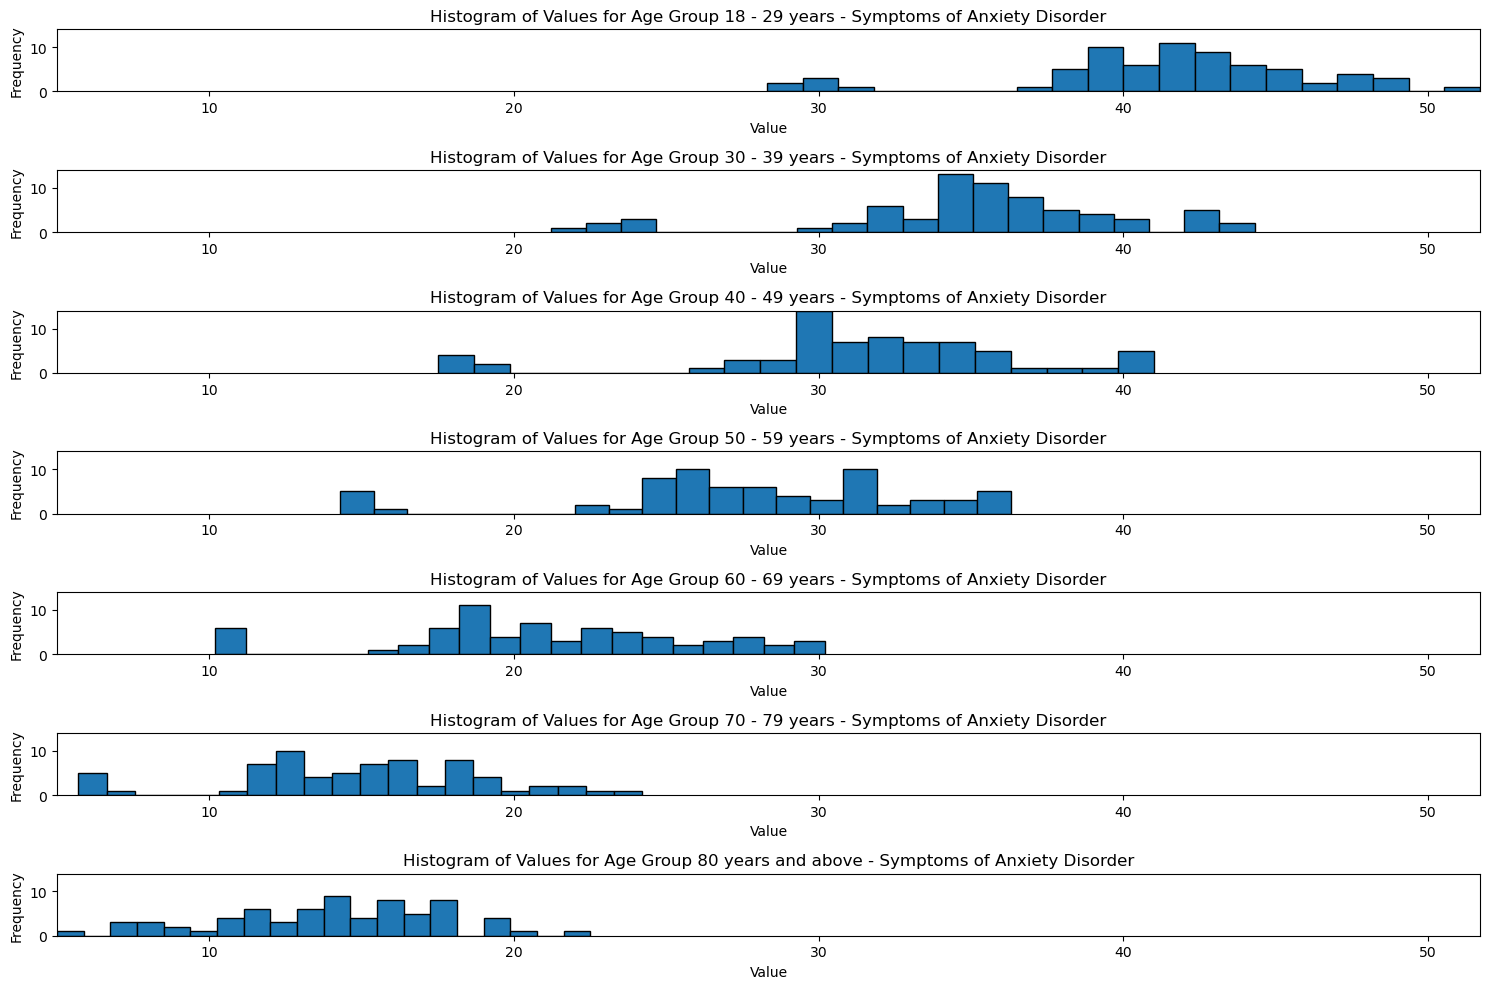

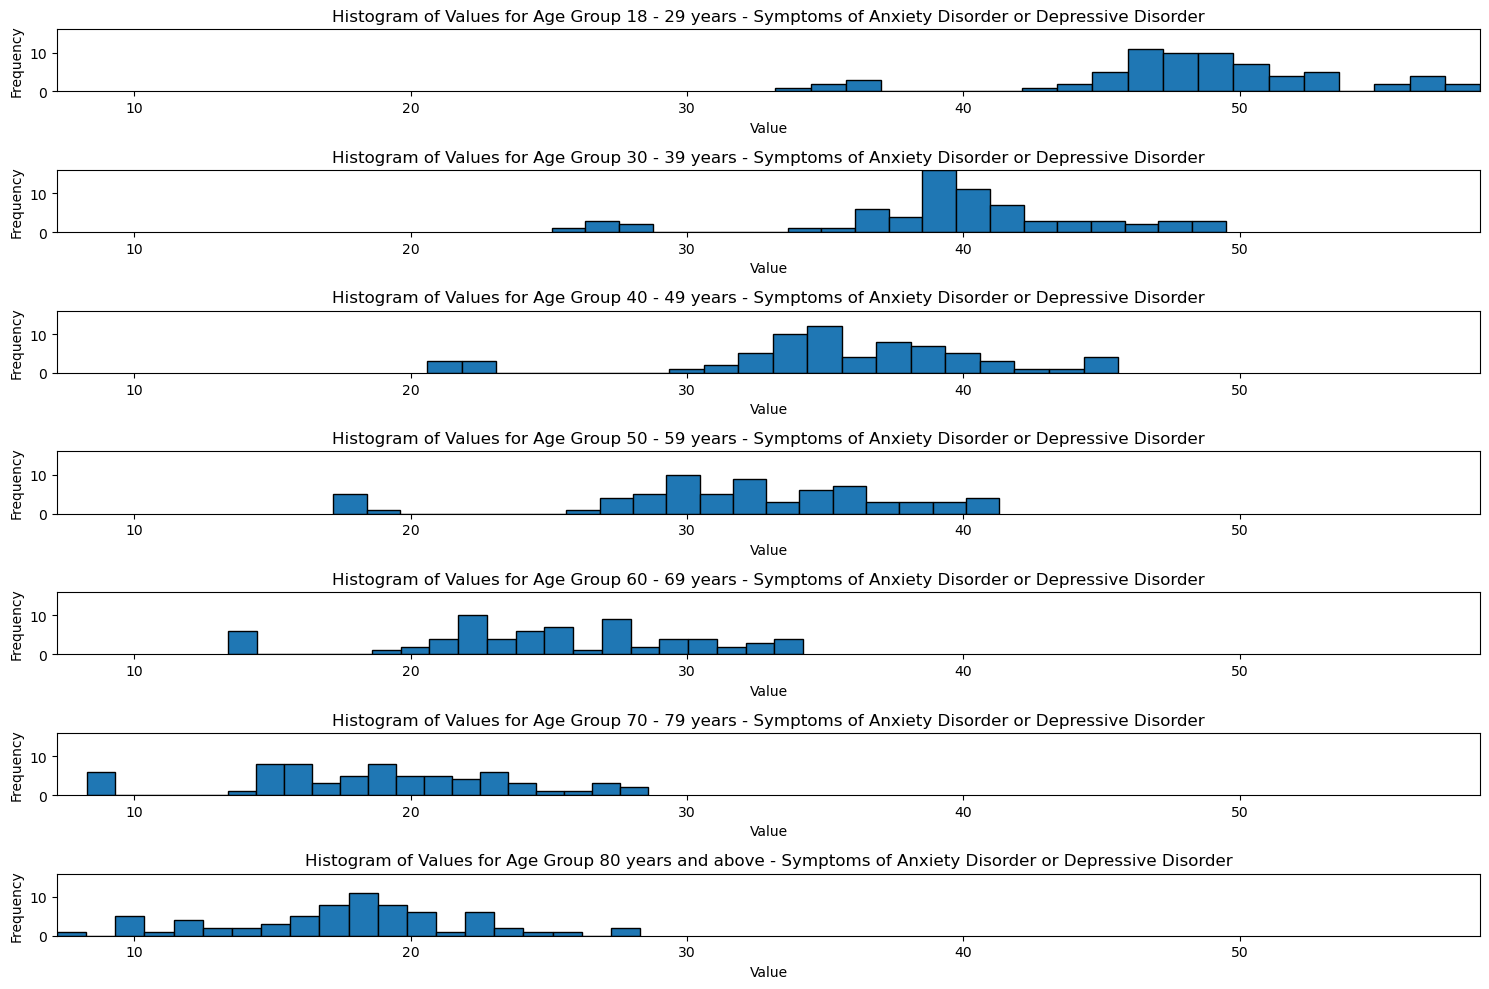

In [5]:
# Define the list of indicators you want to analyze
indicators = age_df['Indicator'].unique()  # Or specify specific indicators

# Iterate over each indicator
for indicator in indicators:
    # Filter the DataFrame for the specific indicator
    indicator_df = age_df[age_df['Indicator'] == indicator]
    
    # Define the age groups to compare
    age_groups = indicator_df['Subgroup'].unique()  # Or specify specific age groups
    
    # Calculate global min and max for the 'Value' column to ensure consistent x-axis and y-axis
    global_min_value = indicator_df['Value'].min()
    global_max_value = indicator_df['Value'].max()
    
    global_max_freq = 0
    # Compute the maximum frequency across all histograms for consistent y-axis scaling
    for age_group in age_groups:
        subset = indicator_df[indicator_df['Subgroup'] == age_group]
        
        # Drop NaN values from the 'Value' column
        subset = subset.dropna(subset=['Value'])
        
        if not subset.empty:
            counts, _ = np.histogram(subset['Value'], bins=20)
            global_max_freq = max(global_max_freq, counts.max())
    
    # Set up the plot with subplots for each age group
    plt.figure(figsize=(15, 10))
    
    for i, age_group in enumerate(age_groups):
        plt.subplot(len(age_groups), 1, i + 1)
        subset = indicator_df[indicator_df['Subgroup'] == age_group]
        
        # Drop NaN values from the 'Value' column
        subset = subset.dropna(subset=['Value'])
        
        if not subset.empty:
            plt.hist(subset['Value'], bins=20, edgecolor='black')
            plt.title(f'Histogram of Values for Age Group {age_group} - {indicator}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.xlim(global_min_value, global_max_value)  # Set the same x-axis limits
            plt.ylim(0, global_max_freq)  # Set the same y-axis limits
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.savefig('Value histograms by Age Group and Indicator.png')
    plt.show()

In [6]:
#Creating Stats Function
# Step 1: Load the CSV file into a DataFrame
ages = pd.read_csv(indicators_A_D_path)

# Step 2: Define a function to process each indicator
def generate_summary_statistics(df, indicator_name):
   
    # Filter the DataFrame by the specific Indicator
    filtered_df = df.loc[df['Indicator'] == indicator_name]
    
    # Generate summary statistics
    mean = filtered_df.groupby('Subgroup')['Value'].mean()
    median = filtered_df.groupby('Subgroup')['Value'].median()
    variance = filtered_df.groupby('Subgroup')['Value'].var()
    standard_dev = filtered_df.groupby('Subgroup')['Value'].std()
    sem = filtered_df.groupby('Subgroup')['Value'].sem()
    
    # Assemble the resulting series into a single summary DataFrame
    summary_stats_df = pd.DataFrame({
        "Value Median": median,
        "Value Variance": variance,
        "Value Standard Deviation": standard_dev,
        "Value Standard Error": sem,
    })
    
    return summary_stats_df

# Step 3: List of indicators to process
indicators = ['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']

# Create a dictionary to store DataFrames for each indicator
summary_stats_dfs = {}

# Apply the function for each indicator
for indicator in indicators:
    summary_stats_dfs[indicator] = generate_summary_statistics(age_df, indicator)

# Display the results (example for the first indicator)
for indicator, stats_df in summary_stats_dfs.items():
    print(f"Summary Statistics for {indicator}:")
    display(stats_df)  
    print() 


Summary Statistics for Symptoms of Depressive Disorder:


,Value Median,Value Variance,Value Standard Deviation,Value Standard Error
Subgroup,,,,
18 - 29 years,35.8,25.104876,5.010477,0.603191
30 - 39 years,27.2,14.848687,3.853399,0.463895
40 - 49 years,24.0,16.330554,4.041108,0.486492
50 - 59 years,21.9,18.329275,4.281270,0.515404
60 - 69 years,16.3,12.545286,3.541932,0.426399
70 - 79 years,12.2,10.027033,3.166549,0.381208
80 years and above,12.2,11.199608,3.346582,0.402881



Summary Statistics for Symptoms of Anxiety Disorder:


,Value Median,Value Variance,Value Standard Deviation,Value Standard Error
Subgroup,,,,
18 - 29 years,41.9,22.182766,4.709858,0.567000
30 - 39 years,35.5,24.186935,4.918021,0.592060
40 - 49 years,31.7,27.360563,5.230733,0.629706
50 - 59 years,27.7,28.787677,5.365415,0.645920
60 - 69 years,20.8,23.743943,4.872776,0.586613
70 - 79 years,15.1,16.663137,4.082051,0.491421
80 years and above,14.6,13.340682,3.652490,0.439708



Summary Statistics for Symptoms of Anxiety Disorder or Depressive Disorder:


,Value Median,Value Variance,Value Standard Deviation,Value Standard Error
Subgroup,,,,
18 - 29 years,48.4,27.727315,5.265673,0.633913
30 - 39 years,39.8,26.480733,5.145943,0.619499
40 - 49 years,35.4,30.412481,5.514751,0.663898
50 - 59 years,31.8,33.550030,5.792239,0.697304
60 - 69 years,24.9,27.140733,5.209677,0.627171
70 - 79 years,18.9,22.633981,4.757518,0.572738
80 years and above,18.1,19.103124,4.370712,0.526172


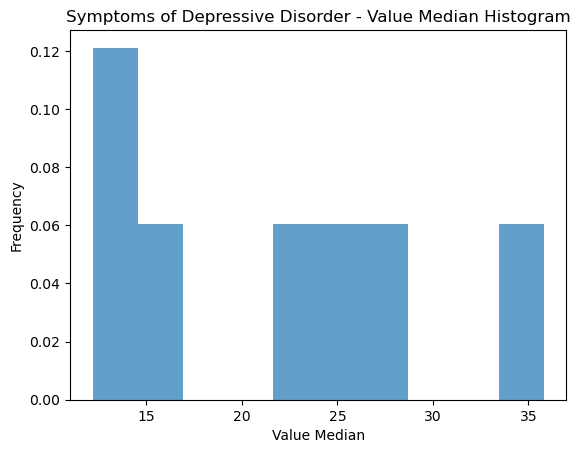

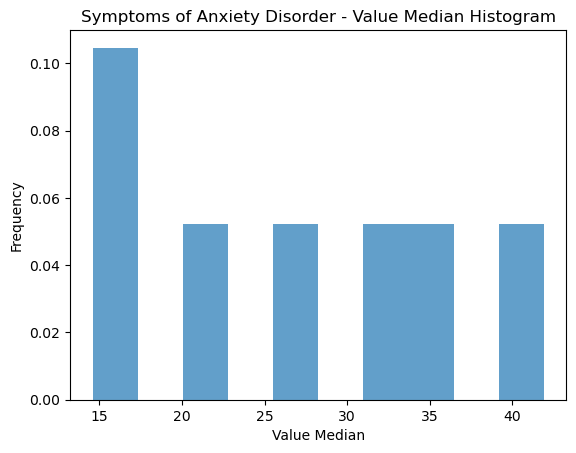

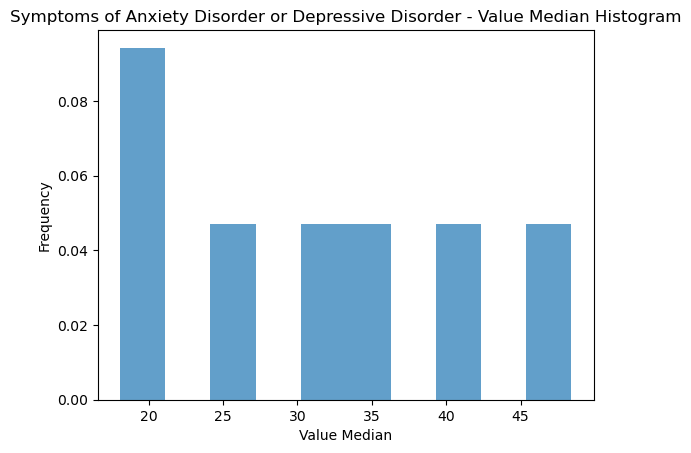

In [7]:
# Create histograms for the desired statistics
def plot_histograms(summary_stats_dfs, stat_name, indicator_name):
    # Check if the statistic exists in the DataFrame
    if stat_name in summary_stats_dfs[indicator_name].columns:
        # Plot the histogram
        summary_stats_dfs[indicator_name][stat_name].plot(kind='hist', bins=10, density = True, alpha=0.7, title=f"{indicator_name} - {stat_name} Histogram")
        plt.xlabel(stat_name)
        plt.ylabel('Frequency')
        plt.savefig('historgrams of median by indicator for Age')
        plt.show()
    else:
        print(f"{stat_name} not found in {indicator_name} summary statistics DataFrame")

# Define the statistic you want to visualize with histograms
statistic_to_visualize = "Value Median" 
# Loop through the indicators and create histograms
for indicator in indicators:
    plot_histograms(summary_stats_dfs, statistic_to_visualize, indicator)

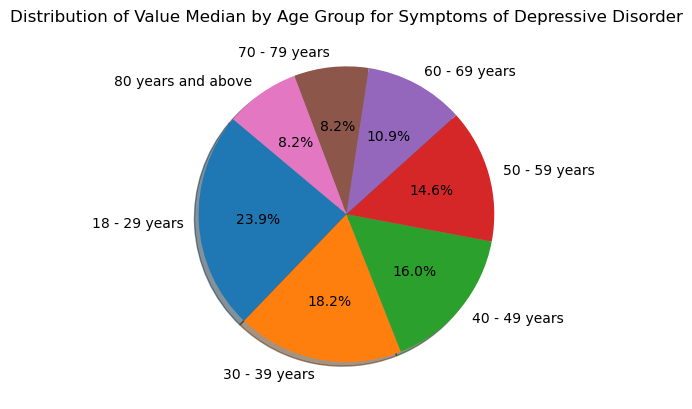

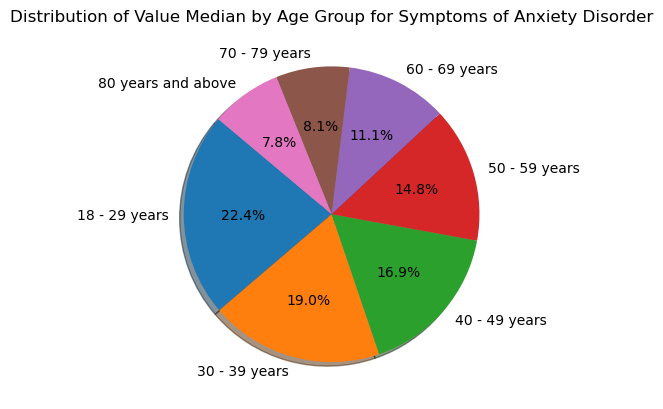

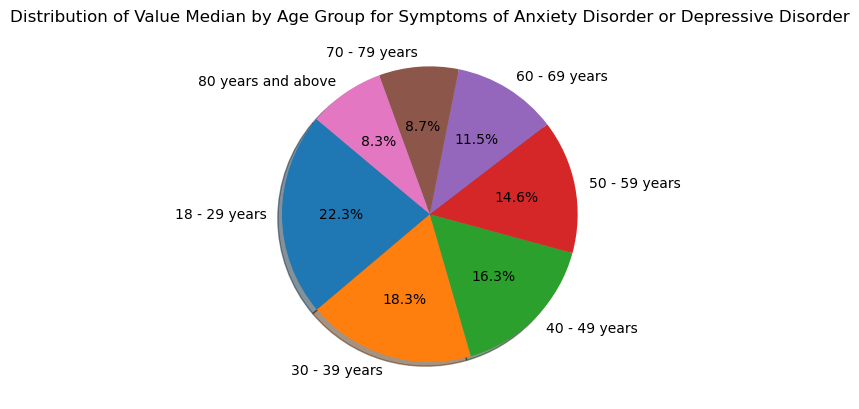

In [8]:
# Function to create a pie chart
def create_pie_chart(df, indicator_name):
    # Check if "Value Median" exists in the DataFrame
    if "Value Median" in df.columns:
        # Plot the pie chart
        df["Value Median"].plot.pie(
            labels=df.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            shadow=True
        )
        
        # Add title and display the chart
        plt.title(f"Distribution of Value Median by Age Group for {indicator_name}")
        plt.ylabel('')  # Hide the y-label since it's redundant in a pie chart
        plt.savefig('Pie Chart by Age Group and Indicators.png')
        plt.show()
    else:
        print(f"'Value Median' not found in {indicator_name} summary statistics DataFrame")

# Generate pie charts for each indicator
for indicator in indicators:
    create_pie_chart(summary_stats_dfs[indicator], indicator)

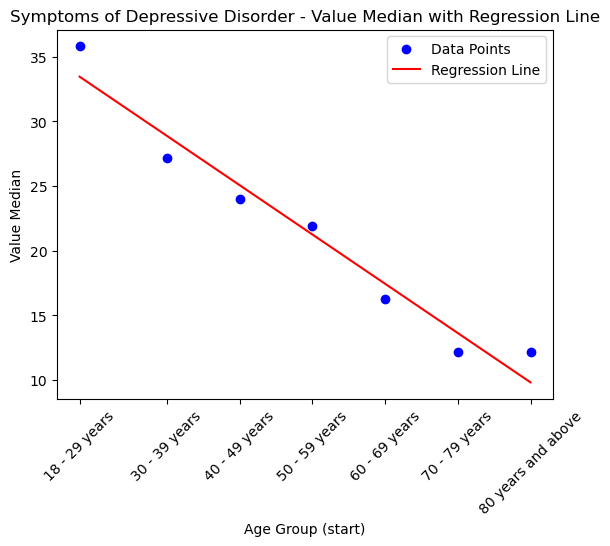

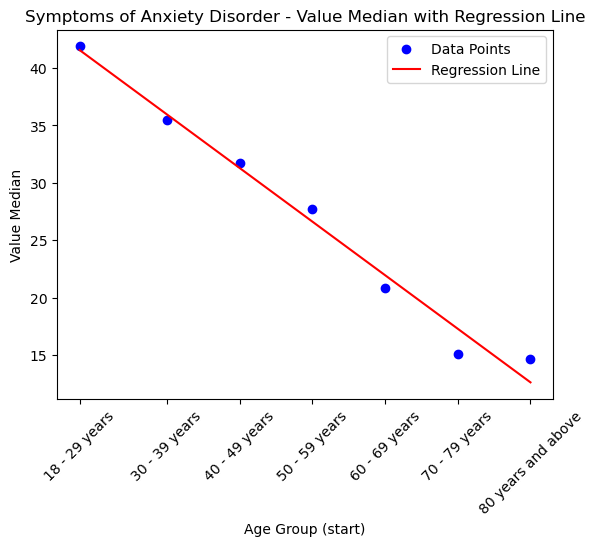

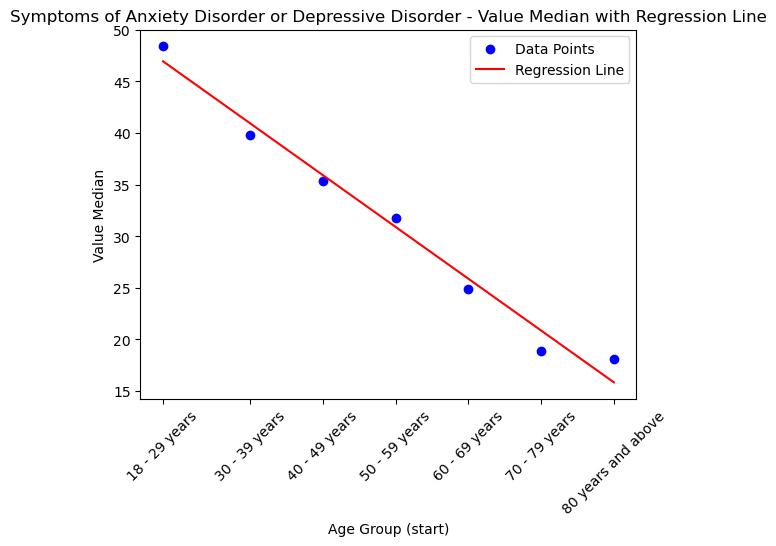

In [9]:
# Function to plot data with a linear regression line
def plot_with_regression_line(df, stat_name, indicator_name):
    # Check if the statistic exists in the DataFrame
    if stat_name in df.columns:
        # Prepare the data for linear regression
        x = np.array([int(age.split()[0]) for age in df.index]).reshape(-1, 1)  # Extract numerical part of age groups
        y = df[stat_name].values.reshape(-1, 1)  # The chosen statistic as the y-axis
        
        # Fit the linear regression model
        model = LinearRegression()
        model.fit(x, y)
        
        # Predict y values based on the model
        y_pred = model.predict(x)
        
        # Plot the data points
        plt.scatter(x, y, color='blue', label='Data Points')
        
        # Plot the regression line
        plt.plot(x, y_pred, color='red', label='Regression Line')
        
        # Add labels and title
        plt.xlabel('Age Group (start)')
        plt.ylabel(stat_name)
        plt.title(f"{indicator_name} - {stat_name} with Regression Line")
        plt.xticks(ticks=x.flatten(), labels=df.index, rotation=45)  # Use age groups as labels
        plt.legend()
        plt.savefig('Regression Lines for Ages.png')
        plt.show()
    else:
        print(f"{stat_name} not found in {indicator_name} summary statistics DataFrame")

# Define the statistic you want to visualize with a regression line
statistic_to_visualize = "Value Median"  # Example: Change to "Value Median", "Value Variance", etc.

# Loop through the indicators and create plots with regression lines
for indicator in indicators:
    plot_with_regression_line(summary_stats_dfs[indicator], statistic_to_visualize, indicator)


# Race and Ethnicity
--
### Does Race and Ethnicity play a role in frequency of symptoms?

In [10]:
race_ethnicity_df = indicators_df[indicators_df['Group'].str.contains('By Race/Hispanic ethnicity')]
race_ethnicity_df

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
10,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,29.4,26.8,32.1,26.8 - 32.1,NaN
11,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic White, single race",1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,21.4,20.6,22.1,20.6 - 22.1,NaN
12,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Black, single race",1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.6,23.7,27.5,23.7 - 27.5,NaN
13,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.6,20.3,27.1,20.3 - 27.1,NaN
14,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,28.3,24.8,32.0,24.8 - 32.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16030,Symptoms of Anxiety Disorder or Depressive Dis...,By Race/Hispanic ethnicity,United States,Hispanic or Latino,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,22.4,20.3,24.6,20.3 - 24.6,NaN
16031,Symptoms of Anxiety Disorder or Depressive Dis...,By Race/Hispanic ethnicity,United States,"Non-Hispanic White, single race",4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,20.7,20.2,21.2,20.2 - 21.2,NaN
16032,Symptoms of Anxiety Disorder or Depressive Dis...,By Race/Hispanic ethnicity,United States,"Non-Hispanic Black, single race",4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,17.3,15.4,19.3,15.4 - 19.3,NaN
16033,Symptoms of Anxiety Disorder or Depressive Dis...,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,15.1,12.8,17.7,12.8 - 17.7,NaN


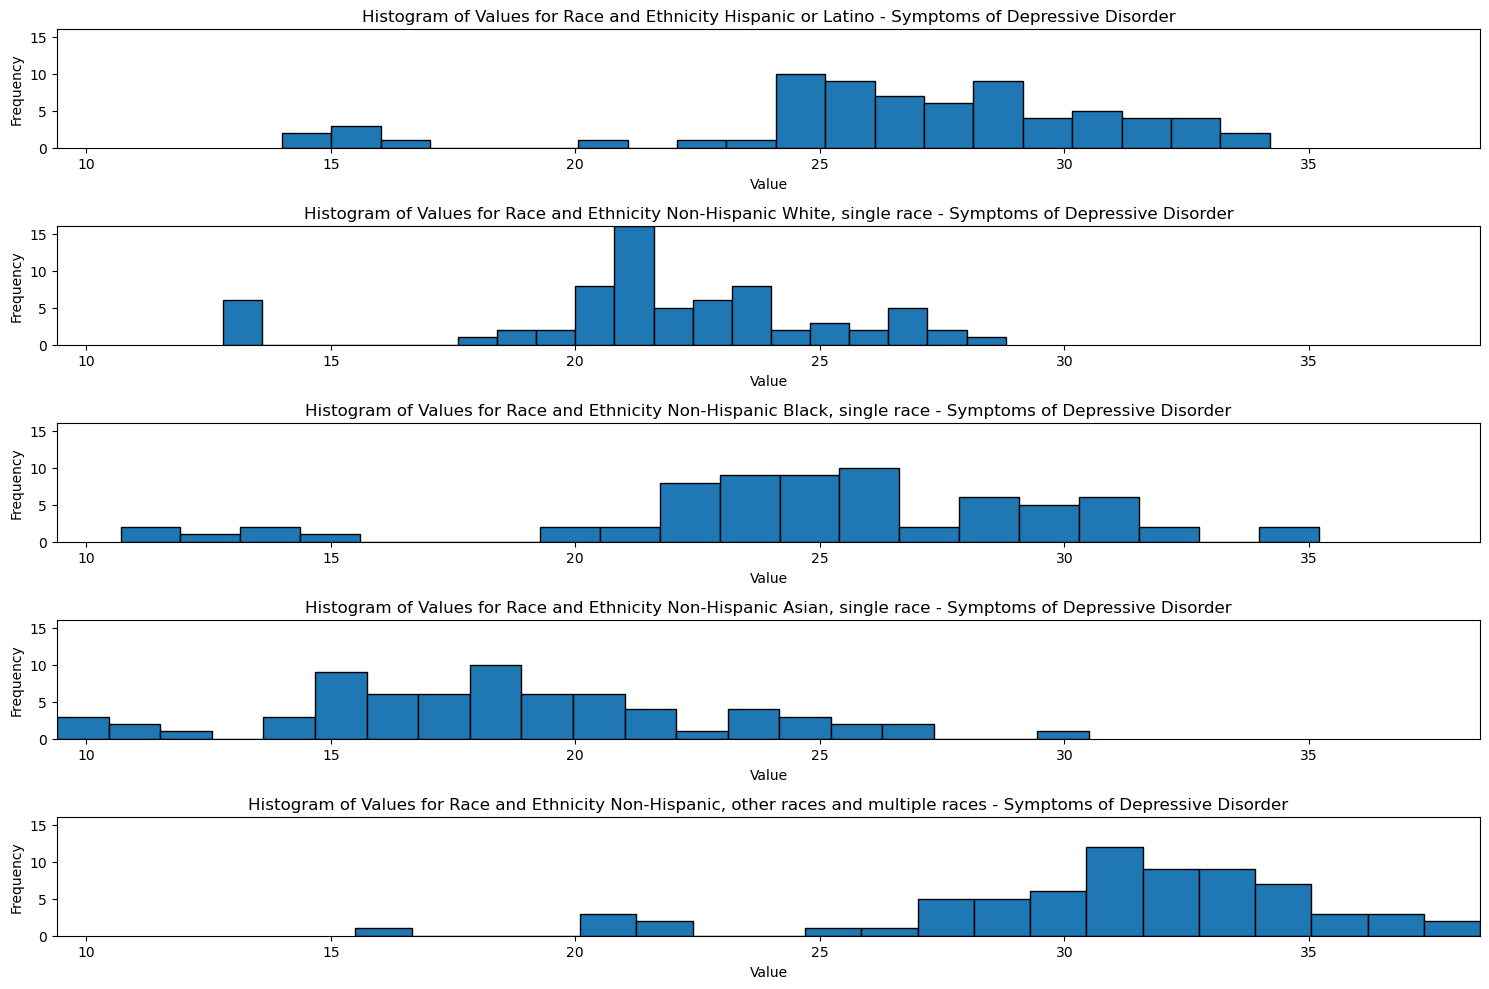

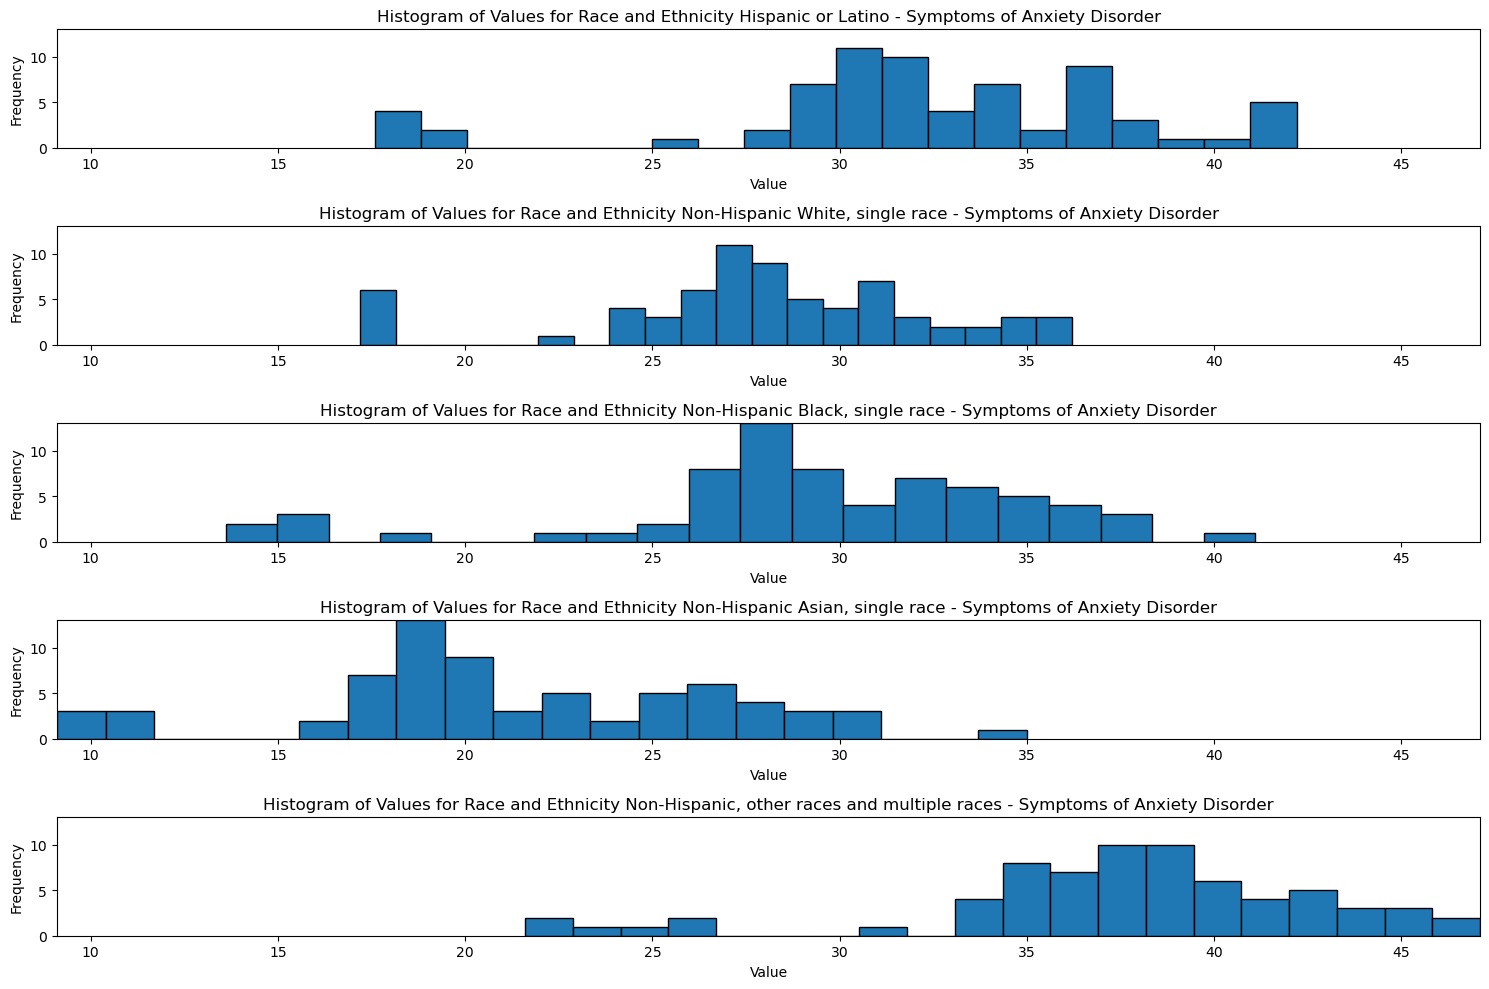

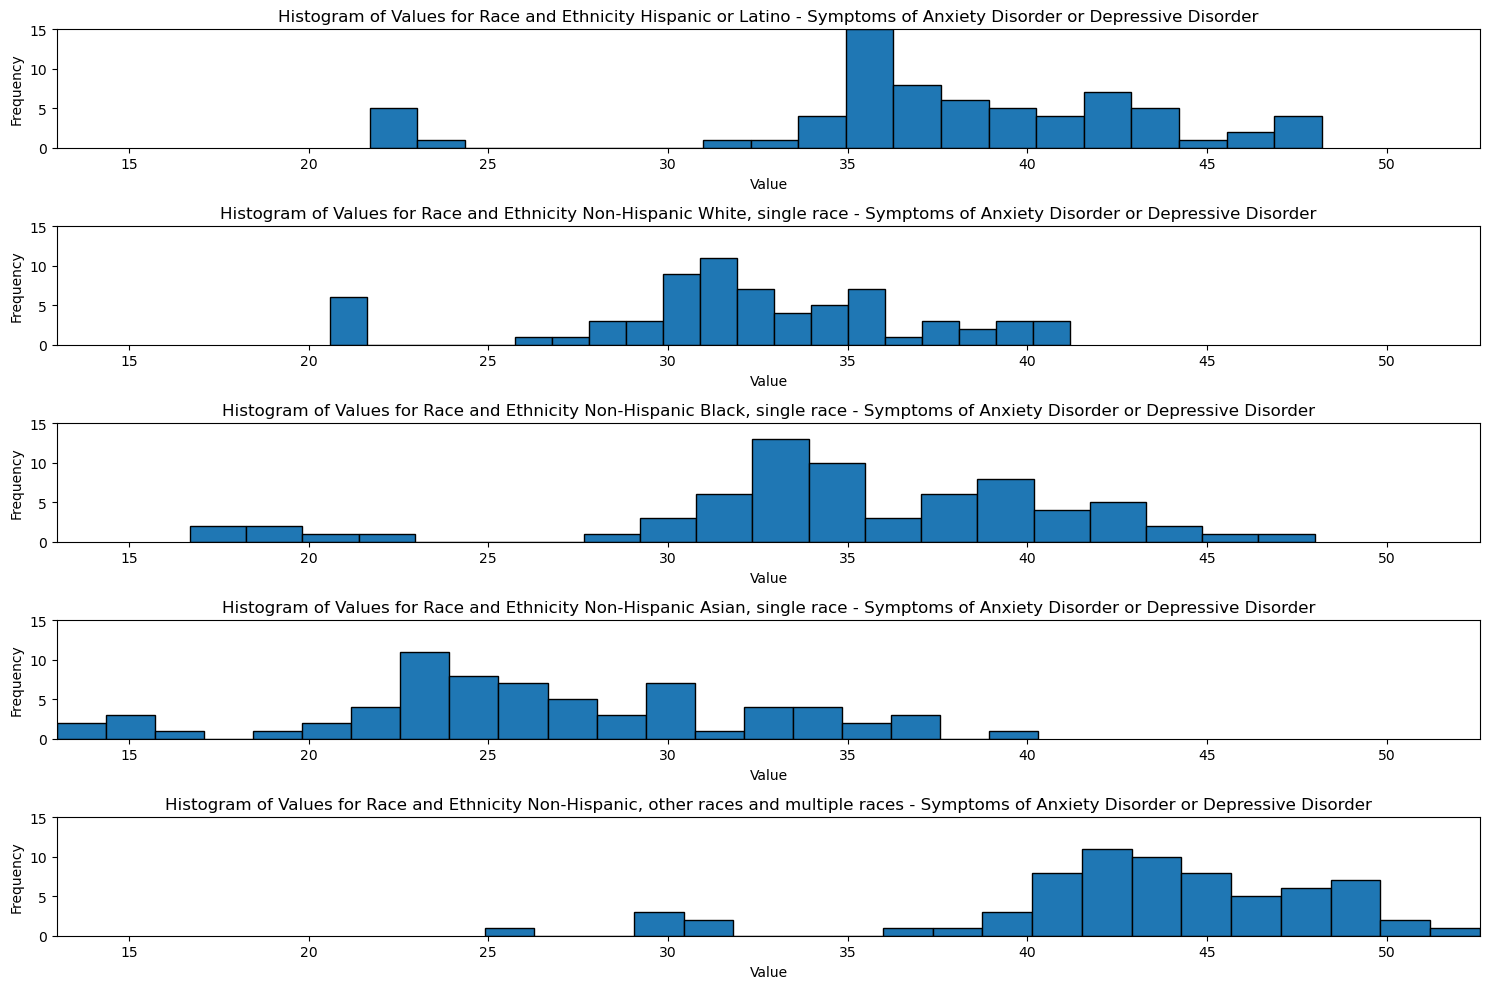

In [12]:
# Define the list of indicators you want to analyze
indicators = race_ethnicity_df['Indicator'].unique()

# Iterate over each indicator
for indicator in indicators:
    
    # Filter the DataFrame for the specific indicator
    indicator_df = race_ethnicity_df[race_ethnicity_df['Indicator'] == indicator]
    
    # Define the race/ethnicity groups to compare
    RE_groups = indicator_df['Subgroup'].unique()
    
    # Calculate global min and max for the 'Value' column to ensure consistent x-axis and y-axis
    global_min_value = indicator_df['Value'].min()
    global_max_value = indicator_df['Value'].max()
    
    global_max_freq = 0
    # Compute the maximum frequency across all histograms for consistent y-axis scaling
    for RE_group in RE_groups:
        subset = indicator_df[indicator_df['Subgroup'] == RE_group]
        
        # Drop NaN values from the 'Value' column
        subset = subset.dropna(subset=['Value'])
        
        if not subset.empty:
            counts, _ = np.histogram(subset['Value'], bins=20)
            global_max_freq = max(global_max_freq, counts.max())
    
    # Set up the plot with subplots for each race/ethnicity group
    plt.figure(figsize=(15, 10))
    
    for i, RE_group in enumerate(RE_groups):
        plt.subplot(len(RE_groups), 1, i + 1)
        subset = indicator_df[indicator_df['Subgroup'] == RE_group]
        
        # Drop NaN values from the 'Value' column
        subset = subset.dropna(subset=['Value'])
        
        if not subset.empty:
            plt.hist(subset['Value'], bins=20, edgecolor='black')
            plt.title(f'Histogram of Values for Race and Ethnicity {RE_group} - {indicator}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.xlim(global_min_value, global_max_value)  # Set the same x-axis limits
            plt.ylim(0, global_max_freq)  # Set the same y-axis limits
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.savefig('Histograms by Indicator and RaceEthnicity.png')
    plt.show()

In [13]:
#Create stats function
#Step 1: Load the CSV file into a DataFrame
race_ethnicity = pd.read_csv(indicators_A_D_path)

# Step 2: Define a function to process each indicator
def generate_summary_statistics(df, indicator_name):
   
    # Filter the DataFrame by the specific Indicator
    filtered_df = df.loc[df['Indicator'] == indicator_name]
    
    # Generate summary statistics
    mean = filtered_df.groupby('Subgroup')['Value'].mean()
    median = filtered_df.groupby('Subgroup')['Value'].median()
    variance = filtered_df.groupby('Subgroup')['Value'].var()
    standard_dev = filtered_df.groupby('Subgroup')['Value'].std()
    sem = filtered_df.groupby('Subgroup')['Value'].sem()
    
    # Assemble the resulting series into a single summary DataFrame
    summary_stats_df = pd.DataFrame({
        "Value Total Mean": mean,
        "Value Median": median,
        "Value Variance": variance,
        "Value Standard Deviation": standard_dev,
        "Value Standard Error": sem,
    })
    
    return summary_stats_df

# Step 3: List of indicators to process
indicators = ['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']

# Create a dictionary to store DataFrames for each indicator
re_summary_stats_dfs = {}

# Apply the function for each indicator
for indicator in indicators:
    re_summary_stats_dfs[indicator] = generate_summary_statistics(race_ethnicity_df, indicator)

# Display the results (example for the first indicator)
for indicator, stats_df in re_summary_stats_dfs.items():
    print(f"Summary Statistics for {indicator}:")
    display(stats_df)  
    print() 


Summary Statistics for Symptoms of Depressive Disorder:


,Value Total Mean,Value Median,Value Variance,Value Standard Deviation,Value Standard Error
Subgroup,,,,,
Hispanic or Latino,26.676812,26.8,21.231513,4.607767,0.554710
"Non-Hispanic Asian, single race",18.581159,18.0,19.048022,4.364404,0.525412
"Non-Hispanic Black, single race",25.053623,24.9,25.565465,5.056230,0.608699
"Non-Hispanic White, single race",21.757971,21.5,12.984825,3.603446,0.433804
"Non-Hispanic, other races and multiple races",30.888406,31.4,19.209864,4.382906,0.527640



Summary Statistics for Symptoms of Anxiety Disorder:


,Value Total Mean,Value Median,Value Variance,Value Standard Deviation,Value Standard Error
Subgroup,,,,,
Hispanic or Latino,32.257971,32.1,32.087472,5.664581,0.681935
"Non-Hispanic Asian, single race",21.418841,20.3,30.053022,5.482064,0.659963
"Non-Hispanic Black, single race",29.420290,29.5,32.840759,5.730686,0.689893
"Non-Hispanic White, single race",27.998551,27.8,20.229557,4.497728,0.541463
"Non-Hispanic, other races and multiple races",37.427536,37.6,28.482025,5.336855,0.642482



Summary Statistics for Symptoms of Anxiety Disorder or Depressive Disorder:


,Value Total Mean,Value Median,Value Variance,Value Standard Deviation,Value Standard Error
Subgroup,,,,,
Hispanic or Latino,37.666667,37.4,37.784608,6.146919,0.740002
"Non-Hispanic Asian, single race",26.426087,25.7,36.247251,6.020569,0.724791
"Non-Hispanic Black, single race",34.886957,34.4,41.335269,6.429251,0.773991
"Non-Hispanic White, single race",32.137681,32.0,23.770618,4.875512,0.586943
"Non-Hispanic, other races and multiple races",43.018841,43.3,29.107434,5.395131,0.649497


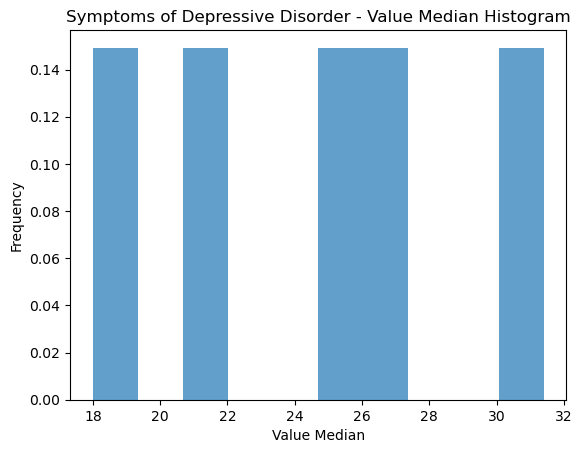

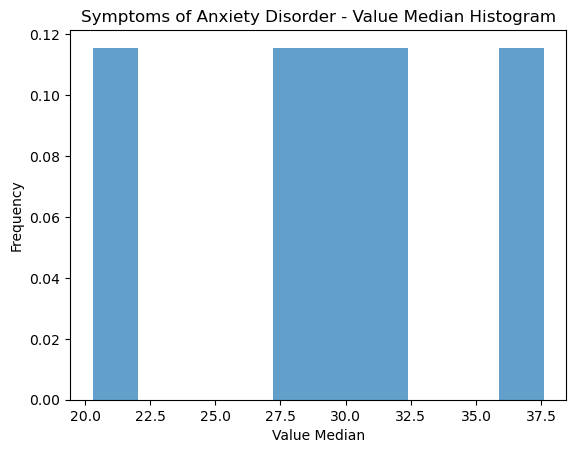

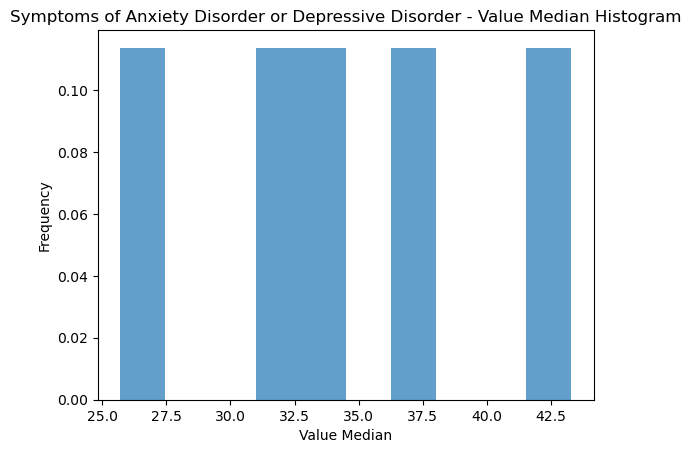

In [14]:
# Create histograms for the desired statistics
def plot_histograms(re_summary_stats_dfs, stat_name, indicator_name):
    # Check if the statistic exists in the DataFrame
    if stat_name in re_summary_stats_dfs[indicator_name].columns:
        # Plot the histogram
        re_summary_stats_dfs[indicator_name][stat_name].plot(kind='hist', bins=10, density = True, alpha=0.7, title=f"{indicator_name} - {stat_name} Histogram")
        plt.xlabel(stat_name)
        plt.ylabel('Frequency')
        plt.savefig('Median Histograms of Race and Ethnicity.png')
        plt.show()
    else:
        print(f"{stat_name} not found in {indicator_name} summary statistics DataFrame")

# Define the statistic you want to visualize with histograms
statistic_to_visualize = "Value Median"  

# Loop through the indicators and create histograms
for indicator in indicators:
    plot_histograms(re_summary_stats_dfs, statistic_to_visualize, indicator)

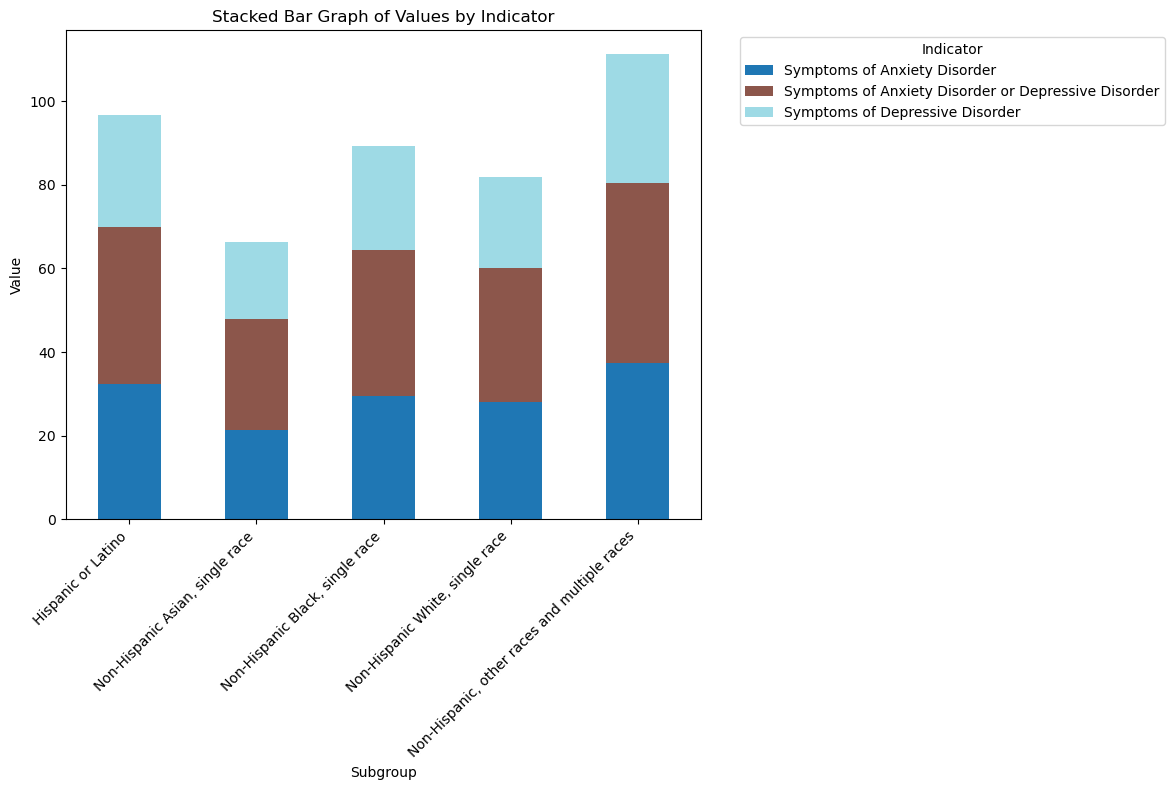

In [16]:
# Pivot the DataFrame to have 'Subgroup' as columns and 'Indicator' as the bars
pivot_df = race_ethnicity_df.pivot_table(index='Subgroup', columns='Indicator', values='Value')

# Create the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="tab20")

# Add labels and title
plt.xlabel('Subgroup')
plt.ylabel('Value')
plt.title('Stacked Bar Graph of Values by Indicator')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('Stacked Bar Graphs by Indicator and RaceEthnicity.png')
plt.show()